In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
casename = 'fates_clm50_global_4x5_historicaltransient_nofire_2e3f469f_5e6fa21f'
datadir = '/glade/scratch/charlie/archive/'+casename+'/lnd/hist/'

### preprocess the history file using ncrcat because xr.open_mfdataset is too damn slow
merged_filename = datadir+casename+'.clm2.sofar.nc'

In [3]:
data_in = xr.open_dataset(merged_filename)

In [4]:
ntim = len(data_in.variables['time'])
IM = len(data_in.variables['lon'])
JM = len(data_in.variables['lat'])

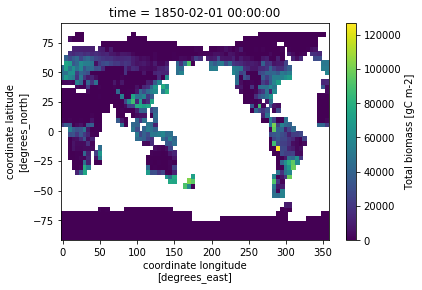

In [5]:
data_in.ED_biomass.isel(time=0).plot()

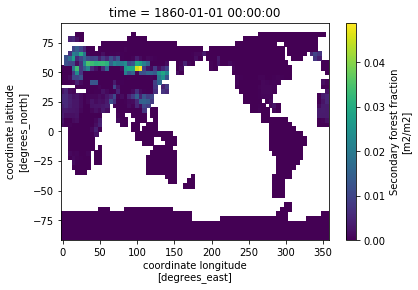

In [6]:
data_in.SECONDARY_FOREST_FRACTION.isel(time=ntim-1).plot()

/glade/work/charlie/my_npl_clone/lib/python3.6/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


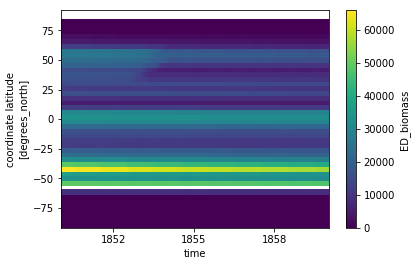

In [7]:
data_in.ED_biomass.mean(dim='lon').plot(x='time', y='lat')

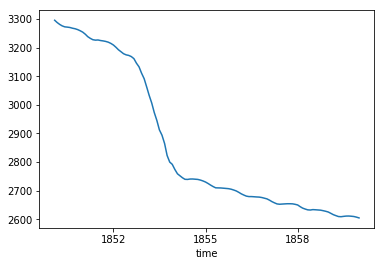

In [8]:
(data_in.area * data_in.ED_biomass * 1e6 * 1e-15).sum(dim='lon').sum(dim='lat').plot(x='time')

In [9]:
data_in.ED_biomass

<xarray.DataArray 'ED_biomass' (time: 120, lat: 46, lon: 72)>
array([[[ 0.,  0., ...,  0.,  0.],
        [ 0.,  0., ...,  0.,  0.],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[ 0.,  0., ...,  0.,  0.],
        [ 0.,  0., ...,  0.,  0.],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       ...,

       [[ 0.,  0., ...,  0.,  0.],
        [ 0.,  0., ...,  0.,  0.],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[ 0.,  0., ...,  0.,  0.],
        [ 0.,  0., ...,  0.,  0.],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]], dtype=float32)
Coordinates:
  * time     (time) object 1850-02-01 00:00:00 ... 1860-01-01 00:00:00
  * lon      (lon) float32 0.0 5.0 10.0 15.0 20.0 ... 340.0 345.0 350.0 355.0
  * lat      (lat) float32 -90.0 -86.0 -82.0 -78.0 -74.0 ... 78.0 82.0 86.0 90.0
Attributes:
    long_name:     Total biomass
  

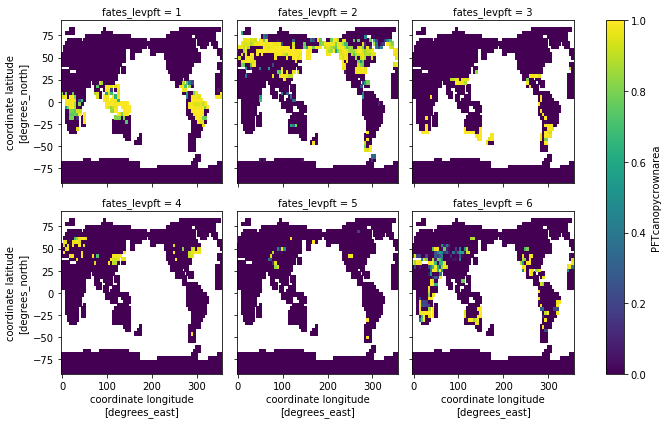

In [10]:
(data_in.PFTcanopycrownarea.isel(time=0)*1e-4).plot(x='lon',y='lat',col='fates_levpft', col_wrap=3)

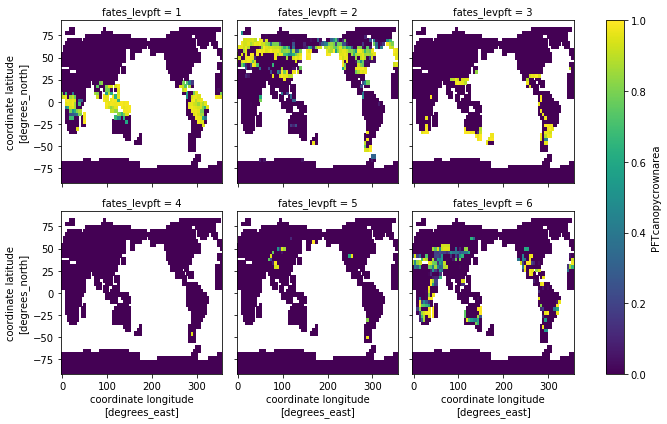

In [11]:
(data_in.PFTcanopycrownarea.isel(time=ntim-1)*1e-4).plot(x='lon',y='lat',col='fates_levpft', col_wrap=3)

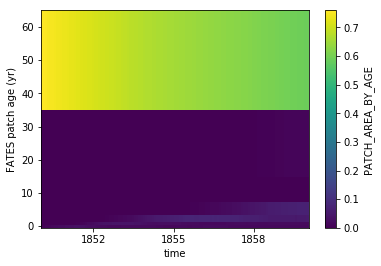

In [12]:
data_in.PATCH_AREA_BY_AGE.mean(dim='lon').mean(dim='lat').plot(x='time', y='fates_levage')

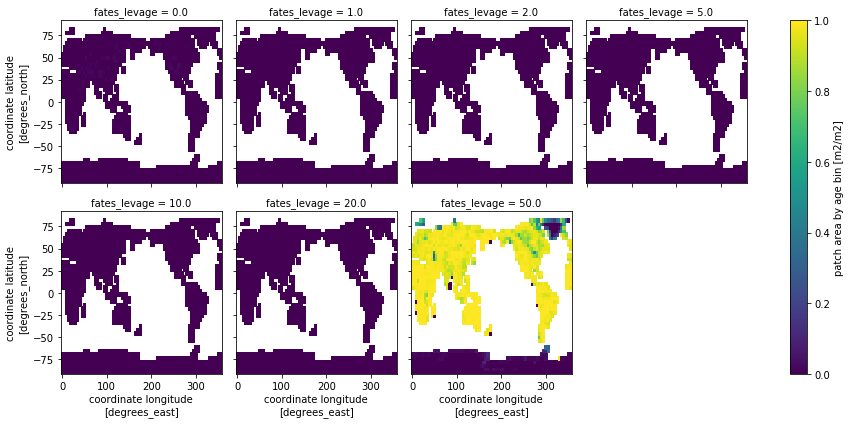

In [13]:
data_in.PATCH_AREA_BY_AGE.isel(time=0).plot(x='lon',y='lat',col='fates_levage', col_wrap=4)

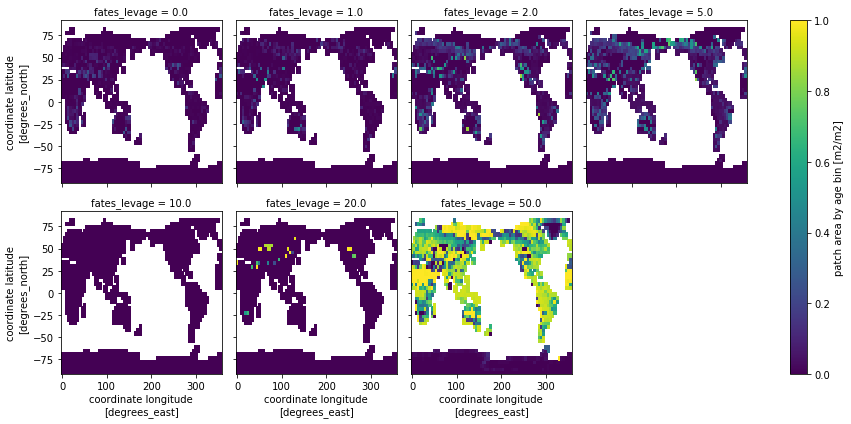

In [14]:
data_in.PATCH_AREA_BY_AGE.isel(time=ntim-1).plot(x='lon',y='lat',col='fates_levage', col_wrap=4)

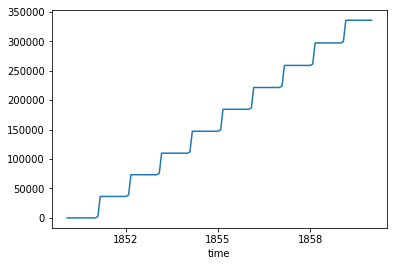

In [15]:
## plot timeseries of secondary forest area
(data_in.area * data_in.SECONDARY_FOREST_FRACTION).sum(dim='lat').sum(dim='lon').plot()

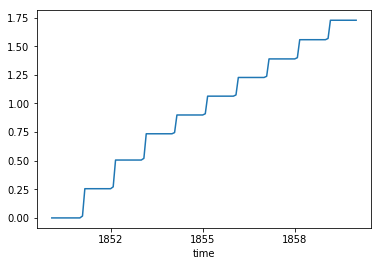

In [16]:
## plot timeseries of logged wood
(data_in.area * data_in.WOOD_PRODUCT * 1e6*1e-15).sum(dim='lat').sum(dim='lon').plot()